In [7]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import itertools

# Load the CSV file
df = pd.read_csv('Louisiana County All Data.csv')

# Extract the latitudes and longitudes
coordinates = df[['Latitude', 'Longitude']]

# Function to calculate distances
def calculate_distances(coords):
    n = len(coords)
    distance_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i + 1, n):
            # Calculate geodesic distance and convert to miles
            distance = geodesic((coords.iloc[i]['Latitude'], coords.iloc[i]['Longitude']),
                                (coords.iloc[j]['Latitude'], coords.iloc[j]['Longitude'])).miles
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance  # Symmetric matrix
            
    return distance_matrix

# Compute the distance matrix
distance_matrix = calculate_distances(coordinates)

# Convert the numpy array to a DataFrame
distance_df = pd.DataFrame(distance_matrix, index=df['Parish name'], columns=df['Parish name'])

# Export the DataFrame to a CSV file
distance_df.to_csv('Pairwise County Distances.csv')
print("Distance matrix exported successfully.")

Distance matrix exported successfully.


In [8]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('County Adjacency.txt', sep='|')

# Filter for Louisiana parishes (Louisiana uses 'Parish' instead of 'County')
louisiana_data = data[data['County Name'].str.contains('Parish, LA')]

# Clean up parish names by removing ' Parish, LA'
louisiana_data['County Name'] = louisiana_data['County Name'].str.replace(' Parish, LA', '')
louisiana_data['Neighbor Name'] = louisiana_data['Neighbor Name'].str.replace(' Parish, LA', '')

# Extract unique parishes
parishes = louisiana_data['County Name'].unique()
parishes.sort()

# Initialize the adjacency matrix
n = len(parishes)
adj_matrix = np.zeros((n, n), dtype=int)

# Fill the adjacency matrix
for i, parish in enumerate(parishes):
    # Get neighbors of the current parish
    neighbors = louisiana_data[louisiana_data['County Name'] == parish]['Neighbor Name'].values
    
    for neighbor in neighbors:
        if neighbor in parishes:
            j = np.where(parishes == neighbor)[0][0]
            adj_matrix[i, j] = 1

# Set diagonal to 0 (a parish is not a neighbor to itself)
np.fill_diagonal(adj_matrix, 0)

# Convert the adjacency matrix to a DataFrame for better readability
adj_matrix_df = pd.DataFrame(adj_matrix, index=parishes, columns=parishes)

# Display the matrix
print(adj_matrix_df)

# Export the DataFrame to a CSV file
adj_matrix_df.to_csv('Pairwise County Adjacency.csv')
print("Adjacency matrix exported successfully.")

                  Acadia  Allen  Ascension  Assumption  Avoyelles  Beauregard  \
Acadia                 0      0          0           0          0           0   
Allen                  0      0          0           0          0           1   
Ascension              0      0          0           1          0           0   
Assumption             0      0          1           0          0           0   
Avoyelles              0      0          0           0          0           0   
...                  ...    ...        ...         ...        ...         ...   
Webster                0      0          0           0          0           0   
West Baton Rouge       0      0          0           0          0           0   
West Carroll           0      0          0           0          0           0   
West Feliciana         0      0          0           0          1           0   
Winn                   0      0          0           0          0           0   

                  Bienville

/var/folders/vb/2qlhpmcx7d59wbfxp2qr42b40000gn/T/ipykernel_1932/3645030150.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisiana_data['County Name'] = louisiana_data['County Name'].str.replace(' Parish, LA', '')
/var/folders/vb/2qlhpmcx7d59wbfxp2qr42b40000gn/T/ipykernel_1932/3645030150.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisiana_data['Neighbor Name'] = louisiana_data['Neighbor Name'].str.replace(' Parish, LA', '')


In [10]:
adj_distances_matrix_df = adj_matrix_df * distance_df
adj_distances_matrix_df.to_csv('Pairwise County Adjacency Distances.csv')
print("Adjacency Distance matrix exported successfully.")

Adjacency Distance matrix exported successfully.


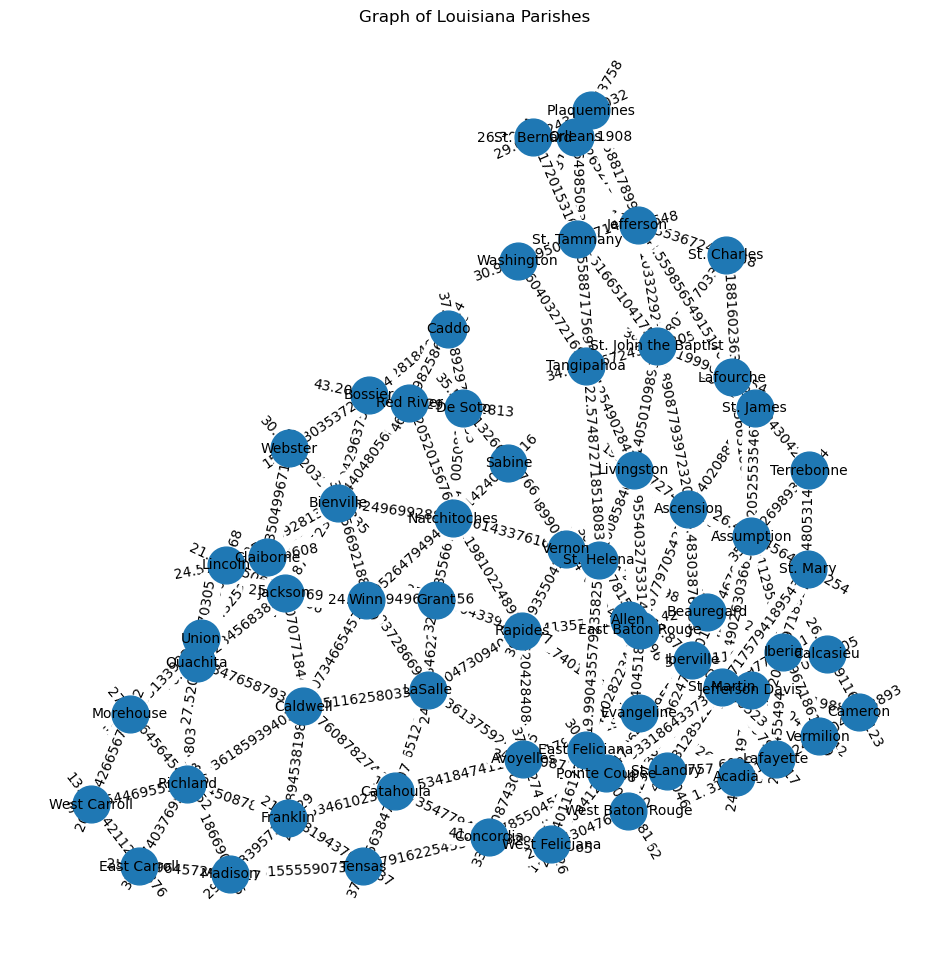

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the adjacency matrix from a CSV file
df = pd.read_csv('Pairwise County Adjacency Distances.csv', index_col=0)

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for i in df.index:
    for j in df.columns:
        weight = df.at[i, j]
        if weight > 0:  # Only add an edge if the weight is nonzero
            G.add_edge(i, j, weight=weight)

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=1)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# Show edge weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Graph of Louisiana Parishes')
plt.axis('off')  # Turn off the axis
plt.show()
